<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [4]:
corrwithFeature=df.corrwith(df['price'])
corrwithFeature.head()

id            -0.016762
price          1.000000
bedrooms       0.308350
bathrooms      0.525138
sqft_living    0.702035
dtype: float64

In [5]:
df1 = pd.DataFrame(corrwithFeature)
df1.drop(index=['price'],inplace=True)
df1.idxmax()

0    sqft_living
dtype: object

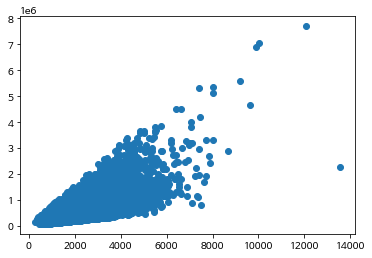

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['sqft_living'],df['price'])

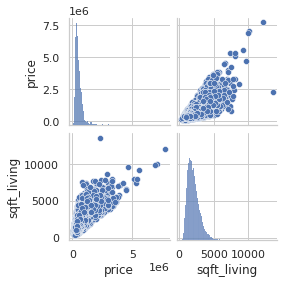

In [7]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['price','sqft_living']
sns.pairplot(df[cols], height=2);

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

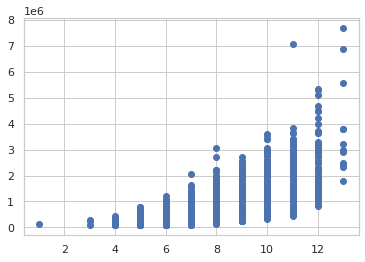

In [8]:
plt.scatter(df['grade'],df['price'])

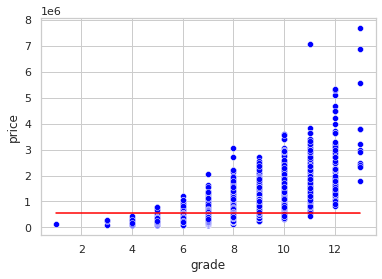

In [9]:
x = df['grade']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [10]:
from sklearn.linear_model import LinearRegression
## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

In [11]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [12]:
## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test = [[x] for x in df['grade']]
y_pred = model.predict(X_test)

In [14]:
y_pred

array([[403157.96019888],
       [403157.96019888],
       [194700.3977405 ],
       ...,
       [403157.96019888],
       [611615.52265726],
       [403157.96019888]])

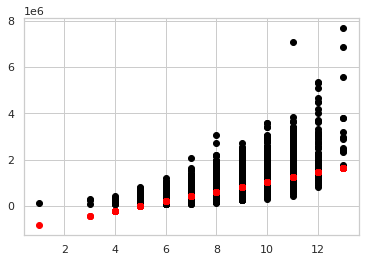

In [15]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 빨간 점으로 나타내 보겠습니다.
plt.scatter(X_test, y_pred, color='red', linewidth=1);

In [16]:
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} grade 주택 가격 예측: ${int(y_pred[0])} (1 grade당 추가금: ${int(model.coef_[0])})"

    return pred

In [17]:
## grade = 6 인 테스트 데이터로 예측
print(explain_prediction(6))

6 grade 주택 가격 예측: $194700 (1 grade당 추가금: $208457)


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [18]:
## 계수(coefficient)
print(model.coef_)

[[208457.56245838]]


In [19]:
## 절편(intercept)
print(model.intercept_)

[-1056044.97700977]


In [20]:
from ipywidgets import interact

# 데코레이터 interact를 추가합니다.
@interact
def explain_prediction(sqft=(1,13)):
    y_pred = model.predict([[sqft]])
    if y_pred[0] < 0 : y_pred[0] = 0
    pred = f"{int(sqft)} grade 주택 가격 예측: ${int(y_pred[0])} (1 grade당 추가금: ${int(model.coef_[0])})"

    return pred

interactive(children=(IntSlider(value=7, description='sqft', max=13, min=1), Output()), _dom_classes=('widget-…

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [21]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature1 = ['sqft_living']
target1 = ['price']
X_train1 = df[feature1]
y_train1 = df[target1]

In [22]:
## 모델을 학습(fit)합니다
model.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test1 = [[x] for x in df['sqft_living']]
y_pred1 = model.predict(X_test1)

In [24]:
y_pred1

array([[287555.06702451],
       [677621.82640197],
       [172499.40418656],
       ...,
       [242655.29616092],
       [405416.96554144],
       [242655.29616092]])

In [25]:
print(model.coef_)

[[280.6235679]]


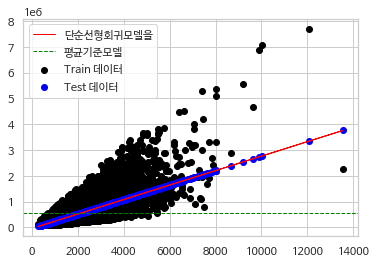

In [29]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train1, y_train1, color='black', linewidth=1, label='Train 데이터')

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test1, y_pred1, color='blue', linewidth=1, label='Test 데이터')

## 단순선형회귀모델을 빨간선으로 나타내 보겠습니다.
plt.plot(X_test1, y_pred1, color='red', linewidth=1, label='단순선형회귀모델을')

# 평균기준모델을 노란선으로 나타내 보겠습니다.
predict1 = df['price'].mean()
plt.axhline(y=predict1, color='green', linestyle='--', linewidth=1, label='평균기준모델')
plt.rc('font', family='NanumBarunGothic') 
plt.legend()

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [27]:
### 이곳에서 과제를 진행해 주세요 ###